In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3504.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3926.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3721.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3851.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3749.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3975.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3223.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3577.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3615.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3931.txt


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.12 MiB | 32.87 MiB/s, done.
Resolving deltas: 100% (11858/11858), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 24.6 MB/s eta 0:00:0000:01


In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov5s.pt")

# Train the model
train_results = model.train(
    data="/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml",  # path to dataset YAML
    epochs=30,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
    cos_lr = True,
    optimizer = "AdamW",
    verbose = True
)

# Evaluate model performance on the validation set
metrics = model.val()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 229MB/s]


Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

100%|██████████| 755k/755k [00:00<00:00, 29.1MB/s]


Overriding model.yaml nc=80 with nc=14

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/train/labels... 3200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3200/3200 [00:26<00:00, 121.92it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:08<00:00, 96.52it/s] 


val: WARNING ⚠️ Cache directory /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.21G      1.246      1.913      1.175         96        640: 100%|██████████| 200/200 [01:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.05it/s]


                   all        800       2877      0.123      0.214     0.0441     0.0243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.16G      1.306      1.614      1.218        116        640: 100%|██████████| 200/200 [00:57<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.74it/s]


                   all        800       2877      0.271      0.267      0.169      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.17G      1.238      1.444      1.171        122        640: 100%|██████████| 200/200 [00:56<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        800       2877      0.454      0.376      0.402      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.17G      1.163      1.299      1.145        105        640: 100%|██████████| 200/200 [00:56<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.42it/s]


                   all        800       2877      0.393      0.412      0.373      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.17G      1.111      1.235      1.112        142        640: 100%|██████████| 200/200 [00:56<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.54it/s]

                   all        800       2877        0.6      0.571        0.6      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.16G       1.06      1.121      1.083        127        640: 100%|██████████| 200/200 [00:56<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]

                   all        800       2877      0.574      0.539      0.543      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.17G      1.022      1.056      1.068        115        640: 100%|██████████| 200/200 [00:56<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.51it/s]

                   all        800       2877      0.587      0.595      0.603      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.17G     0.9948     0.9897      1.055        101        640: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.48it/s]

                   all        800       2877      0.654      0.653      0.687       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.16G     0.9631     0.9525      1.036         98        640: 100%|██████████| 200/200 [00:56<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.62it/s]

                   all        800       2877      0.718       0.65      0.734      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.16G     0.9376     0.9134      1.029         97        640: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.48it/s]

                   all        800       2877      0.695      0.694      0.756      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.17G     0.9167     0.8854      1.014         81        640: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]

                   all        800       2877      0.768      0.714      0.794      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.16G      0.911     0.8627      1.012        137        640: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.57it/s]

                   all        800       2877       0.71      0.713      0.777      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.16G     0.8834      0.816     0.9951        132        640: 100%|██████████| 200/200 [00:56<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]

                   all        800       2877      0.755      0.762      0.811      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.16G     0.8647      0.796     0.9892         60        640: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]

                   all        800       2877      0.803      0.733      0.823      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.16G     0.8462     0.7648     0.9837        120        640: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.50it/s]

                   all        800       2877      0.775      0.784      0.837      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.16G     0.8291     0.7498     0.9735         99        640: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        800       2877       0.78      0.775      0.833      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.17G     0.8091     0.7243     0.9661        123        640: 100%|██████████| 200/200 [00:57<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.35it/s]

                   all        800       2877       0.81      0.788      0.854      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.16G     0.7883     0.6887     0.9545        131        640: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.23it/s]

                   all        800       2877      0.809      0.788      0.858      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.17G     0.7814     0.6775     0.9546         88        640: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.13it/s]

                   all        800       2877      0.852      0.802      0.877      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.16G     0.7586     0.6498     0.9459         84        640: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.28it/s]

                   all        800       2877      0.843      0.832       0.89      0.736


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.16G     0.7353     0.6088     0.9244         41        640: 100%|██████████| 200/200 [00:57<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]

                   all        800       2877      0.865      0.804      0.887      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.16G     0.7231      0.579     0.9171         44        640: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.20it/s]

                   all        800       2877      0.838      0.804      0.857      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.16G     0.7023     0.5573     0.9146         59        640: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.11it/s]

                   all        800       2877      0.891      0.809      0.903      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.16G     0.6893     0.5348     0.9072         54        640: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.18it/s]

                   all        800       2877      0.887      0.827      0.907      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.16G     0.6798     0.5195     0.9007         55        640: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.32it/s]

                   all        800       2877      0.866      0.858      0.908      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.17G     0.6611     0.5061     0.8974         52        640: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        800       2877      0.901      0.838      0.917      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.16G     0.6483     0.4902     0.8894         72        640: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.56it/s]

                   all        800       2877      0.896      0.842      0.918       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.15G     0.6405     0.4819     0.8862         44        640: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]

                   all        800       2877      0.894      0.849      0.921      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.16G     0.6327     0.4747     0.8851         69        640: 100%|██████████| 200/200 [00:56<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]

                   all        800       2877       0.91      0.841      0.923      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.16G     0.6334     0.4704     0.8879         61        640: 100%|██████████| 200/200 [00:56<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.57it/s]

                   all        800       2877       0.92       0.84      0.922      0.786



30 epochs completed in 0.535 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5s summary (fused): 84 layers, 9,116,954 parameters, 0 gradients, 23.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.42it/s]


                   all        800       2877       0.91      0.841      0.923      0.786
                  trak        113        120      0.957      0.923       0.98      0.903
               cyclist        188        234      0.857      0.793      0.841      0.679
                  bike        340        486      0.972      0.854      0.939      0.759
                 tempo        123        134       0.94      0.784      0.917      0.792
                   car        307        524      0.962      0.824      0.948      0.788
                  zeep         78         79      0.811      0.696      0.852      0.745
                  toto         63         66      0.885      0.932      0.973      0.896
            e-rickshaw         53         54        0.9          1      0.981      0.884
         auto-rickshaw        145        192      0.939      0.802      0.911      0.699
                   bus         83         91      0.879      0.879       0.95      0.843
                   va

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5s summary (fused): 84 layers, 9,116,954 parameters, 0 gradients, 23.9 GFLOPs


val: Scanning /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 589.47it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.32it/s]


                   all        800       2877      0.909      0.842      0.923      0.788
                  trak        113        120      0.957      0.923       0.98      0.906
               cyclist        188        234      0.857      0.793      0.847       0.68
                  bike        340        486      0.969      0.854      0.939      0.759
                 tempo        123        134       0.94      0.784      0.917      0.793
                   car        307        524       0.96      0.825      0.948      0.789
                  zeep         78         79      0.811      0.696      0.853      0.752
                  toto         63         66      0.885      0.933      0.974        0.9
            e-rickshaw         53         54        0.9          1      0.981      0.881
         auto-rickshaw        145        192       0.94      0.809      0.911      0.702
                   bus         83         91       0.88      0.883       0.95      0.848
                   va

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.4ms preprocess, 2.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train2


In [4]:
import os
import random
import cv2
import numpy as np
from IPython.display import display, Image
from tqdm import tqdm 
import random
import matplotlib.pyplot as plt
import yaml
import shutil


image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3480.jpg: 384x640 1 cyclist, 1 zeep, 39.4ms
Speed: 2.0ms preprocess, 39.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3415.jpg: 384x640 1 car, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3809.jpg: 384x640 1 tempo, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3884.jpg: 384x640 2 cycle-rickshaws, 4 persons, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yol

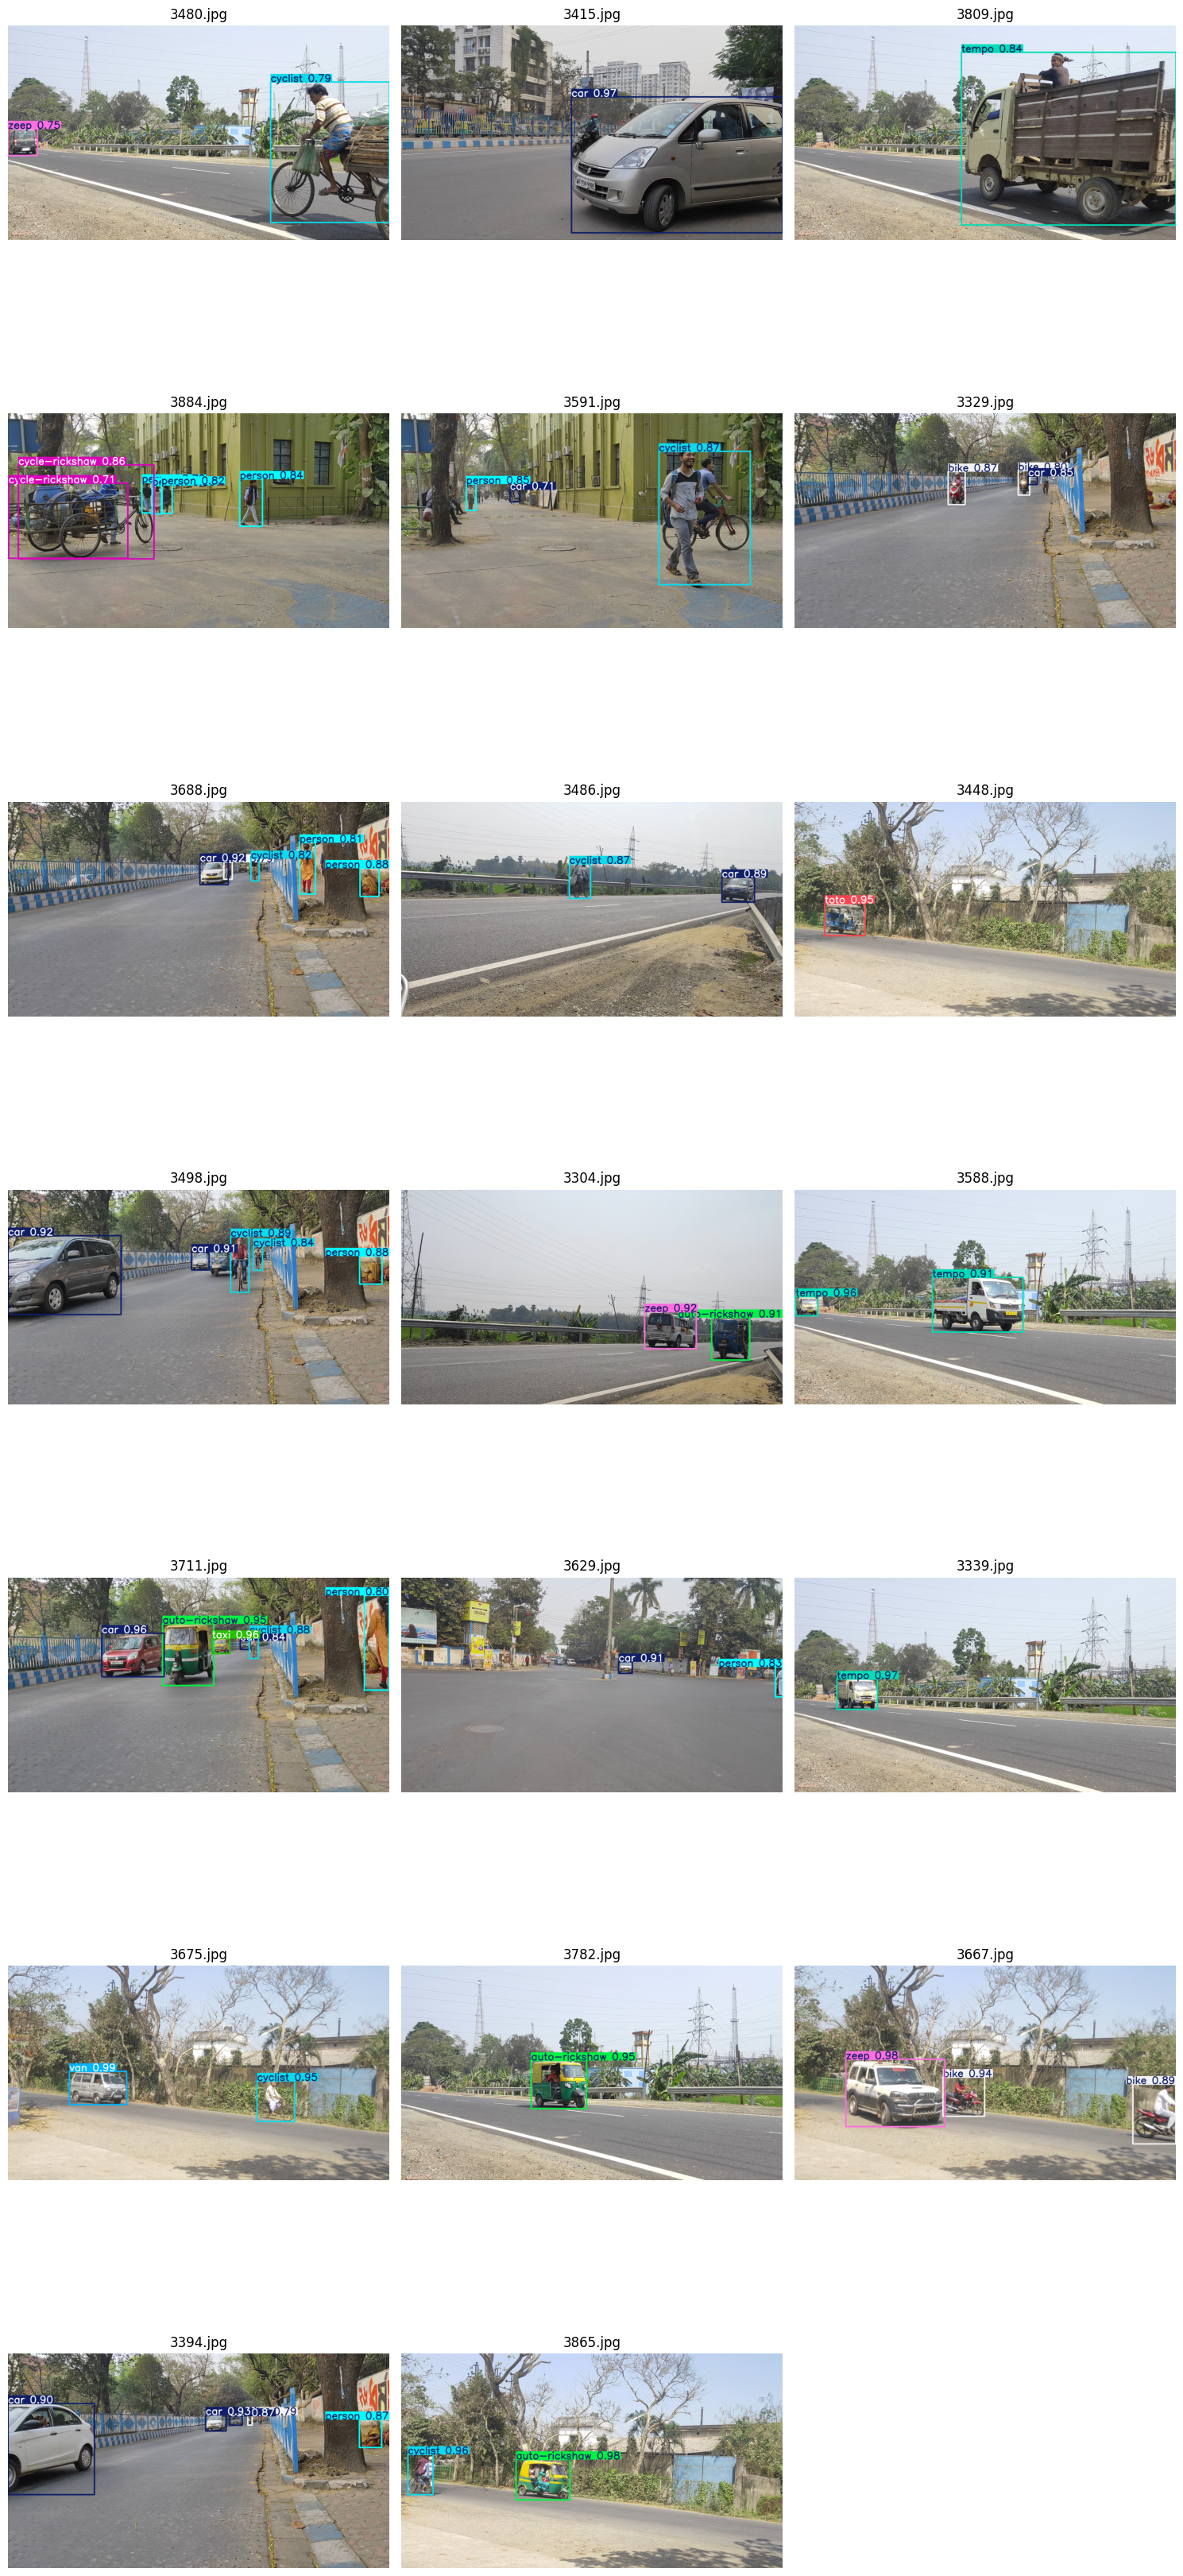

In [6]:
def run_yolov5(image_dir, model_path, total_image=20, output_folder="/kaggle/working/result_vis"):
    # Load the YOLOv5 model
    model = YOLO(model_path)
    
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Loop through all images in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    # Select the specified number of random images or all images if total_image is -1
    if total_image == -1:
        selected_files = image_files
    else:
        selected_files = random.sample(image_files, min(total_image, len(image_files)))

    result_images = []  # List to hold result images

    for image_file in selected_files:
        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)

        # Run YOLOv11 segmentation prediction
        results = model.predict(image_path, conf=0.7, iou=0.7)
        
        # Get the segmented mask and draw it on the image
        result_image = results[0].plot()
        
        # Save the result image in the output folder
        output_image_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_image_path, result_image)
        
        # Append the result image to the list
        result_images.append(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB

    # Display all result images in a grid
    num_images = len(result_images)
    cols = 3  # Number of columns for the grid
    rows = (num_images + cols - 1) // cols  # Calculate the number of rows needed

    plt.figure(figsize=(15, 5 * rows))  # Adjust the figure size as needed
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(result_images[i])
        plt.axis('off')
        plt.title(selected_files[i])  # Optionally add titles

    plt.tight_layout()
    plt.show()

run_yolov5("/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images", model_path = "/kaggle/working/yolov5/runs/detect/train/weights/best.pt")